In [2]:
import copy
import pandas
import warnings
import subprocess
from matplotlib import pyplot as plt
import os
import sys

sys.path.insert(0, "../src")
csv_orig_file = "../datasets/genny2/summary.csv"
csv_new_file = "/tmp/summary.csv"


In [18]:

pd = pandas.read_csv(csv_new_file)
pd

,Unnamed: 0,Task,TaskName,Experiment,Phase,Query,QueryNumber,ContentionFactor,ThreadCount,AverageLatency,...,WorkersMin,WorkersMax,LatencyMax,LatencyMin,DurationTotal,ErrorsTotal,OperationsTotal,DocumentsTotal,SizeTotal,OverheadTotal
0,0,query_es3_1_1.load.inserts,query_es3_1_1,es3,load.inserts,load,load,1,1,4.553863e+06,...,1,1,2.550666e+08,3166221.0,4.608100e+11,0.0,100000.0,100000.0,15638311.0,5.514002e+09
1,1,query_es3_1_1.q1.reads,query_es3_1_1,es3,q1.reads,fixed_1: fixed_hf,1,1,1,1.459350e+07,...,1,1,2.936580e+07,14458224.0,1.462960e+11,0.0,10000.0,10000.0,3550000.0,4.612645e+11
2,2,query_es3_1_1.q2.reads,query_es3_1_1,es3,q2.reads,fixed_1: uar,2,1,1,2.073884e+06,...,1,1,9.552449e+07,1248081.0,2.156200e+10,0.0,10000.0,10000.0,3660340.0,6.081855e+11
3,3,query_es3_1_1.q3.reads,query_es3_1_1,es3,q3.reads,"uar_[1,5]: uar",3,1,1,1.823557e+06,...,1,1,9.478351e+07,465785.0,1.886100e+10,0.0,10000.0,10000.0,3664956.0,6.302179e+11
4,4,query_es3_1_1.q4.reads,query_es3_1_1,es3,q4.reads,"uar_[1,5]: uar_alllow",4,1,1,1.168163e+06,...,1,1,2.664973e+06,466204.0,1.229300e+10,0.0,10000.0,10000.0,3667687.0,6.497332e+11
5,5,query_es3_1_4.load.inserts,query_es3_1_4,es3,load.inserts,load,load,1,4,1.179641e+07,...,4,4,1.009051e+10,3331217.0,3.048990e+11,0.0,100000.0,100000.0,15638311.0,1.375110e+10
6,6,query_es3_1_4.q1.reads,query_es3_1_4,es3,q1.reads,fixed_1: fixed_hf,1,1,4,1.506419e+07,...,4,4,2.150442e+07,14618790.0,3.805000e+10,0.0,10000.0,10000.0,3550000.0,1.228330e+12
7,7,query_es3_1_4.q2.reads,query_es3_1_4,es3,q2.reads,fixed_1: uar,2,1,4,1.933372e+06,...,4,4,9.673147e+07,1215883.0,5.287000e+09,0.0,10000.0,10000.0,3662739.0,1.381419e+12
8,8,query_es3_1_4.q3.reads,query_es3_1_4,es3,q3.reads,"uar_[1,5]: uar",3,1,4,1.780941e+06,...,4,4,1.030312e+08,457577.0,4.872999e+09,0.0,10000.0,10000.0,3665020.0,1.404875e+12
9,9,query_es3_1_4.q4.reads,query_es3_1_4,es3,q4.reads,"uar_[1,5]: uar_alllow",4,1,4,1.169658e+06,...,4,4,2.658828e+06,458185.0,3.088999e+09,0.0,10000.0,10000.0,3668126.0,1.426794e+12


<AxesSubplot: title={'center': 'NEW ES2 Load: Average Latency'}, xlabel='ContentionFactor', ylabel='Average Latency'>

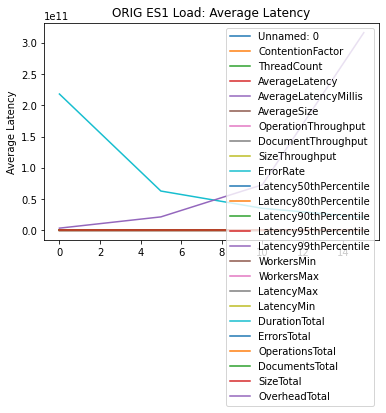

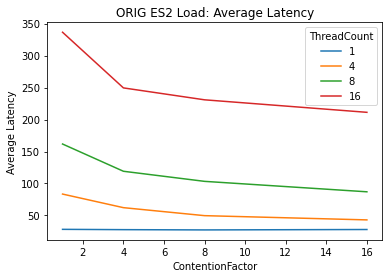

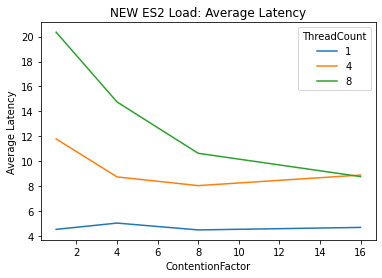

In [3]:
# Make a pivot table for average latency for load and graph it
query = "QueryNumber == 'load' & Experiment == 'es3'"

pd_orig = pandas.read_csv(csv_orig_file)

un_pd1_orig = pd_orig.query("QueryNumber == 'load' & Experiment == 'es1'")
#un_piv_orig = un_pd1_orig.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")

pd1_orig = pd_orig.query(query)
piv_orig = pd1_orig.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")

pd_new = pandas.read_csv(csv_new_file)
pd1_new = pd_new.query(query)
piv_new = pd1_new.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")


un_pd1_orig.plot(title="ORIG ES1 Load: Average Latency", ylabel="Average Latency")

piv_orig.plot(title="ORIG ES2 Load: Average Latency", ylabel="Average Latency")
piv_new.plot(title="NEW ES2 Load: Average Latency", ylabel="Average Latency")


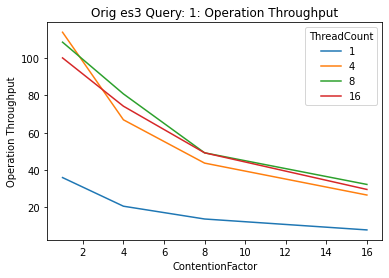

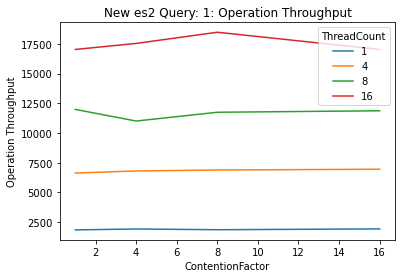

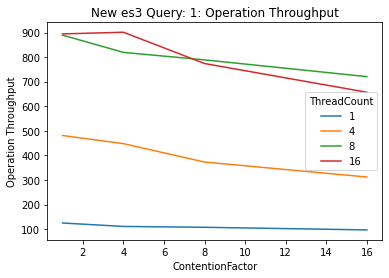

In [28]:
def plot_operation_throughput(file_name, title, query, experiment):
    # Make a pivot table for operation throughput for query and graph it
    pd = pandas.read_csv(file_name)
    pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == '{experiment}'")
    piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")

    piv.plot(title=f"{title} {experiment} Query: {query}: Operation Throughput", ylabel="Operation Throughput")

# plot_operation_throughput(csv_orig_file, "Orig", "load", "es1")
# plot_operation_throughput(csv_orig_file, "Orig", "load", "es3")
# plot_operation_throughput(csv_new_file, "New", "load", "es3")

plot_operation_throughput(csv_orig_file, "Orig", "1", "es3")
plot_operation_throughput(csv_new_file, "New", "1", "es2")
plot_operation_throughput(csv_new_file, "New", "1", "es3")

In [20]:
pd_orig = pandas.read_csv(csv_orig_file)

pd_orig1 = pd_orig.query("QueryNumber == 'load' & Experiment == 'es3'")
pd_orig1["Source"] = "Orig"
#pd_orig1['Source'] = pd_orig1['QueryNumber'].map(lambda x : "Orig")
# pd_orig1.add( df2, fill_value=0 )

#pd_orig1
pd_new = pandas.read_csv(csv_new_file)
pd_new1 = pd_new.query("QueryNumber == 'load' & Experiment == 'es3'")
pd_new1["Source"] = "New"
pd_new1

pd2 = pandas.concat([pd_orig1, pd_new1], ignore_index=True)
pd2


/tmp/ipykernel_2486705/3998469215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_orig1["Source"] = "Orig"
/tmp/ipykernel_2486705/3998469215.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_new1["Source"] = "New"


,Unnamed: 0,Task,TaskName,Experiment,Phase,Query,QueryNumber,ContentionFactor,ThreadCount,AverageLatency,...,WorkersMax,LatencyMax,LatencyMin,DurationTotal,ErrorsTotal,OperationsTotal,DocumentsTotal,SizeTotal,OverheadTotal,Source
0,100,query_es3_1_1.load.inserts,query_es3_1_1,es3,load.inserts,load,load,1,1,2.834882e+07,...,1,7.968172e+07,11075901.0,2.843315e+12,0.0,100000.0,100000.0,15638311.0,8.516556e+09,Orig
1,105,query_es3_1_4.load.inserts,query_es3_1_4,es3,load.inserts,load,load,1,4,8.348018e+07,...,4,3.154254e+10,15171528.0,2.170267e+12,0.0,100000.0,100000.0,15638311.0,1.693608e+10,Orig
2,110,query_es3_1_8.load.inserts,query_es3_1_8,es3,load.inserts,load,load,1,8,1.617055e+08,...,8,3.377118e+10,25603698.0,2.112300e+12,0.0,100000.0,100000.0,15638311.0,4.755534e+10,Orig
3,115,query_es3_1_16.load.inserts,query_es3_1_16,es3,load.inserts,load,load,1,16,3.363745e+08,...,16,4.269554e+10,9349045.0,2.166984e+12,0.0,100000.0,100000.0,15638311.0,1.644225e+11,Orig
4,120,query_es3_4_1.load.inserts,query_es3_4_1,es3,load.inserts,load,load,4,1,2.786549e+07,...,1,7.822590e+07,9983248.0,2.795532e+12,0.0,100000.0,100000.0,15638311.0,9.066991e+09,Orig
5,125,query_es3_4_4.load.inserts,query_es3_4_4,es3,load.inserts,load,load,4,4,6.223929e+07,...,4,1.340561e+10,14666274.0,1.581012e+12,0.0,100000.0,100000.0,15638311.0,1.618154e+10,Orig
6,130,query_es3_4_8.load.inserts,query_es3_4_8,es3,load.inserts,load,load,4,8,1.191094e+08,...,8,1.847259e+10,25703709.0,1.515554e+12,0.0,100000.0,100000.0,15638311.0,4.409853e+10,Orig
7,135,query_es3_4_16.load.inserts,query_es3_4_16,es3,load.inserts,load,load,4,16,2.493982e+08,...,16,3.178302e+10,23527687.0,1.607060e+12,0.0,100000.0,100000.0,15638311.0,1.718888e+11,Orig
8,140,query_es3_8_1.load.inserts,query_es3_8_1,es3,load.inserts,load,load,8,1,2.745365e+07,...,1,7.786848e+07,10266226.0,2.752037e+12,0.0,100000.0,100000.0,15638311.0,6.761936e+09,Orig
9,145,query_es3_8_4.load.inserts,query_es3_8_4,es3,load.inserts,load,load,8,4,4.974220e+07,...,4,7.276492e+09,13830243.0,1.250405e+12,0.0,100000.0,100000.0,15638311.0,1.454920e+10,Orig


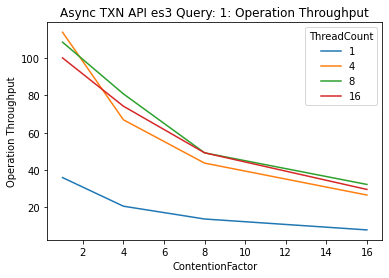

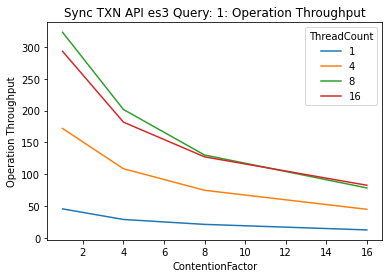

In [18]:
def plot_operation_throughput(file_name, title, query, experiment):
    # Make a pivot table for operation throughput for query and graph it
    pd = pandas.read_csv(file_name)
    pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == '{experiment}'")
    piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")

    piv.plot(title=f"{title} {experiment} Query: {query}: Operation Throughput", ylabel="Operation Throughput")

plot_operation_throughput(csv_orig_file, "Async TXN API", "1", "es3")
plot_operation_throughput(csv_new_file, "Sync TXN API", "1", "es3")


In [ ]:
# Make a pivot table for average latency for query and graph it
pd = pandas.read_csv(csv_file)
pd1 = pd.query("QueryNumber == '2' & Experiment == 'es3'")
piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")
piv.plot(title="ES3 Query 2: Average Latency", ylabel="Average Latency (ms)")


In [ ]:
# Make a pivot table for average latency for query and graph it
pd = pandas.read_csv(csv_file)
pd1 = pd.query("QueryNumber == '2' & Experiment == 'es3'")
piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")
piv.plot(title="ES3 Query 2: Operation Throughput", ylabel="Operation Throughput")